In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('cars.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)
score = regressor.score(X_test,y_test)
display(score)
display(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1) ), 1))

0.9814653948389038

array([[434894.21, 449514.54],
       [288814.15, 294043.96],
       [574624.03, 558312.94],
       [576403.4 , 591733.22],
       [417340.07, 428308.3 ],
       [455762.62, 446396.58],
       [400787.66, 401939.16],
       [630699.76, 617513.34],
       [361488.52, 348775.93],
       [455447.99, 450048.38],
       [555435.22, 580900.33],
       [492269.22, 486606.1 ],
       [440412.52, 457879.11],
       [461691.14, 435474.77],
       [498297.3 , 472782.87],
       [253755.11, 253005.62],
       [648027.92, 644963.13],
       [528340.92, 530264.76],
       [444275.13, 443536.32],
       [371729.69, 366233.65],
       [270222.91, 251958.04],
       [446117.77, 441187.01],
       [504879.12, 504420.91],
       [428194.94, 450853.62],
       [476687.23, 480918.62],
       [450862.61, 454301.55],
       [364745.01, 355236.42],
       [567544.95, 581452.78],
       [277212.98, 289834.91],
       [567445.78, 540155.35],
       [363887.16, 385372.84],
       [328416.81, 324456.4 ],
       [

In [25]:

display(regressor.predict([[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,500000,20,250000,80,1,0,3]]))


array([412597.83])

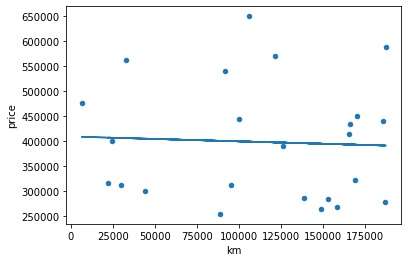

In [26]:
# Plot with km versus price

pd_km_price = dataset[dataset['make'] == 'Honda'][['km', 'price']]


pd_km_price.plot.scatter(x='km', y='price')
#plt.ylim(150000, 1000000)
m, b = np.polyfit(pd_km_price['km'].values, pd_km_price['price'].values, 1)
plt.plot(pd_km_price['km'].values, m*pd_km_price['km'].values+b)


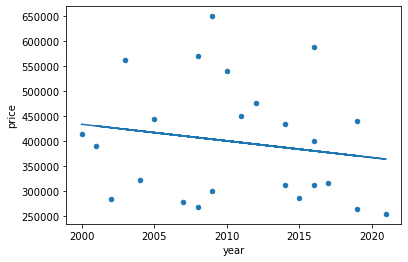

In [27]:
# Plot with km versus price

pd_year_price = dataset[dataset['make'] == 'Honda'][['year', 'price']]


pd_year_price.plot.scatter(x='year', y='price')
#plt.ylim(150000, 1000000)
m, b = np.polyfit(pd_year_price['year'].values, pd_year_price['price'].values, 1)
plt.plot(pd_year_price['year'].values, m*pd_year_price['year'].values+b)
